In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

#import the csv data file
ddata = pd.read_csv('us_contagious_diseases.csv')
dataset = pd.read_csv('us_contagious_diseases.csv')
#display the first 5 rows of the dataset
dataset.head()

,disease,state,year,weeks_reporting,count,population
0,Hepatitis A,Alabama,1966,50,321,3345787.0
1,Hepatitis A,Alabama,1967,49,291,3364130.0
2,Hepatitis A,Alabama,1968,52,314,3386068.0
3,Hepatitis A,Alabama,1969,49,380,3412450.0
4,Hepatitis A,Alabama,1970,51,413,3444165.0


In [2]:
#Extract Hepatitis A from the disease variable
if 'Hepatitis A' in dataset['disease'].unique():
    dataset = dataset[dataset['disease'] == 'Hepatitis A']
#display uniqu values in the disease column
dataset['disease'].unique()

array(['Hepatitis A'], dtype=object)

In [3]:
# Rename Hepatitis A to hepA  if Hepatitis A is found in the disease column
dataset['disease'] = dataset['disease'].replace(['Hepatitis A'],'hepA')

#display unique values in the disease column
dataset['disease'].unique()

array(['hepA'], dtype=object)

In [4]:
print(dataset.head())
print("The length of the dataset is: ", len(dataset))

#Remove all missing or NAN values from the dataset
dataset = dataset.dropna()
print("The length of the dataset is: ", len(dataset))

  disease    state  year  weeks_reporting  count  population
0    hepA  Alabama  1966               50    321   3345787.0
1    hepA  Alabama  1967               49    291   3364130.0
2    hepA  Alabama  1968               52    314   3386068.0
3    hepA  Alabama  1969               49    380   3412450.0
4    hepA  Alabama  1970               51    413   3444165.0
The length of the dataset is:  2346
The length of the dataset is:  2346


In [5]:
# create a new variable called rate and calculate the rate of the disease per 10000 people calculate row by row
for index, row in dataset.iterrows():
    if row['weeks_reporting'] == 0:
        dataset.loc[index,'rate'] = 0
    else:
        dataset.loc[index,'rate'] = (row['count']/row['population'])*10000 * (52/ row['weeks_reporting'])

dataset.head()


,disease,state,year,weeks_reporting,count,population,rate
0,hepA,Alabama,1966,50,321,3345787.0,0.997792
1,hepA,Alabama,1967,49,291,3364130.0,0.917968
2,hepA,Alabama,1968,52,314,3386068.0,0.927329
3,hepA,Alabama,1969,49,380,3412450.0,1.181747
4,hepA,Alabama,1970,51,413,3444165.0,1.222642


In [6]:
#create list of regions in the united states
west=['Alaska','Arizona','California','Colorado','Hawaii','Idaho','Montana','Nevada','New Mexico','Oregon','Utah','Washington','Wyoming']
south=["Alabama", "Arkansas", "Delaware", "District Of Columbia", "Florida", "Georgia", "Kentucky", "Louisiana","Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", "Virginia", "West Virginia"]
midwest=["Illinois", "Indiana", "Iowa", "Kansas", "Michigan","Minnesota", "Missouri", "Nebraska", "North Dakota","Ohio", "South Dakota", "Wisconsin"]
northeast=["Connecticut", "Maine", "Massachusetts", "New Hampshire", "New Jersey", "New York","Pennsylvania", "Rhode Island", "Vermont"]


In [7]:
#create a new variable called region and assign the region to each state
for index, row in dataset.iterrows():
    if row['state'] in west:
        dataset.loc[index,'region'] = 'west'
    elif row['state'] in south:
        dataset.loc[index,'region'] = 'south'
    elif row['state'] in midwest:
        dataset.loc[index,'region'] = 'midwest'
    elif row['state'] in northeast:
        dataset.loc[index,'region'] = 'northeast'
    else:
        dataset.loc[index,'region'] = 'NA'

dataset.head()

,disease,state,year,weeks_reporting,count,population,rate,region
0,hepA,Alabama,1966,50,321,3345787.0,0.997792,south
1,hepA,Alabama,1967,49,291,3364130.0,0.917968,south
2,hepA,Alabama,1968,52,314,3386068.0,0.927329,south
3,hepA,Alabama,1969,49,380,3412450.0,1.181747,south
4,hepA,Alabama,1970,51,413,3444165.0,1.222642,south


In [8]:
# Subset the data
subset_data = dataset[['region', 'rate', 'year']]

# Calculate the mean for each combination of region and year using groupby
aggregate_data = subset_data.groupby(['region', 'year']).agg({'rate': 'mean'}).reset_index()

# Alternatively, you can use the following code with pandas alone to achieve the same result
aggregate_data2 = subset_data.groupby(['region', 'year'], as_index=False).agg({'rate': 'mean'})


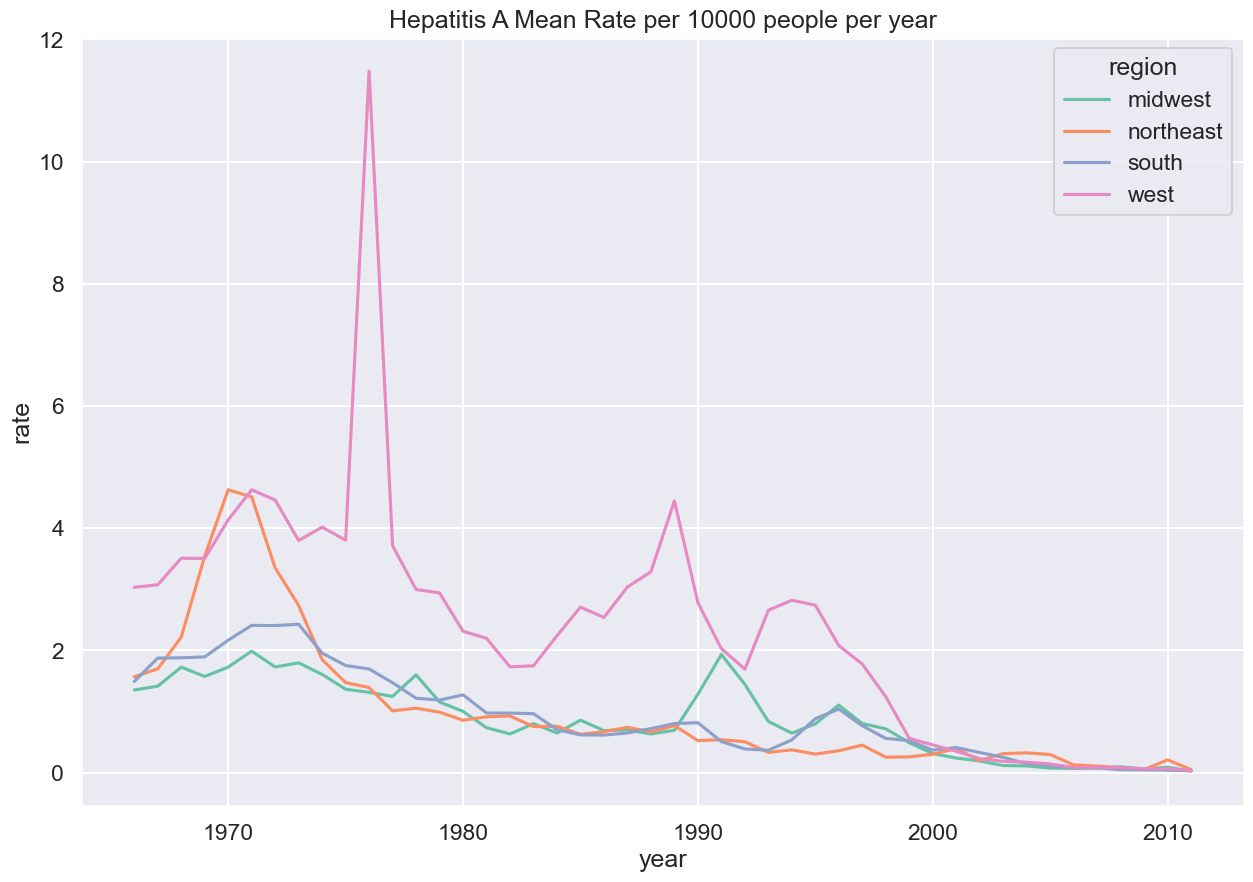

In [9]:
# Plot the data for the subset_data
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('talk')
plt.figure(figsize=(15,10))
sns.lineplot(x='year',y='rate',hue='region',data=aggregate_data)
plt.title('Hepatitis A Mean Rate per 10000 people per year')
plt.show()


In [10]:
#create new dataset for higher rates - When and where were the most cases reported?
# Subset the data
subset_data3 = dataset[['state', 'rate', 'year']]

# Extract rows where rate was over 6.0 (spike in graph by region)
aggregate_data4 = subset_data3.query("rate >= 7.0", inplace = False)
aggregate_data4.sort_values(by=['year','state'], inplace= False)


,state,rate,year
1797,Rhode Island,9.261718,1969
1798,Rhode Island,7.097326,1970
2074,Vermont,8.765318,1970
2075,Vermont,9.760278,1971
52,Alaska,8.809848,1972
1708,Oregon,7.088778,1972
53,Alaska,11.202570,1973
54,Alaska,12.808098,1974
55,Alaska,16.648974,1975
56,Alaska,123.149313,1976


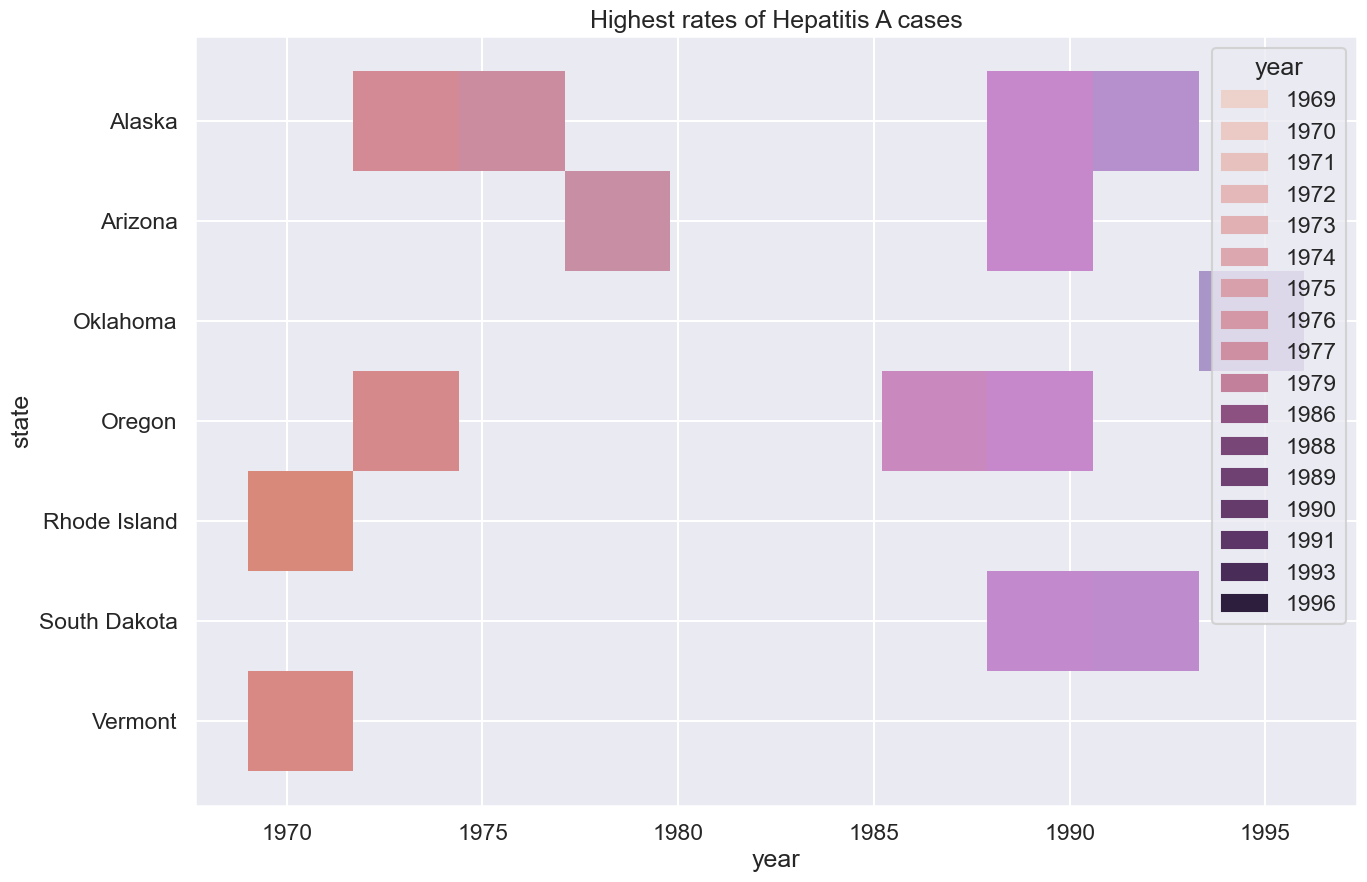

In [11]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('talk')
plt.figure(figsize=(15,10))
sns.histplot(y='state', x="year",bins=10,
            data=aggregate_data4,
            hue="year")
plt.title("Highest rates of Hepatitis A cases")
plt.show()

In [12]:
#create new dataset for 0 counts - When Hep A was eradicated?
# Subset the data
subset_data2 = dataset[['state', 'count', 'year']]

# Extract rows where 0 counts were reported in a combination of state and year
aggregate_data3 = subset_data2.query("count == 0", inplace = False)
aggregate_data3.sort_values(by=['year','state'], inplace= False)

,state,count,year
1580,North Dakota,0,1982
1582,North Dakota,0,1984
2273,Wisconsin,0,1985
2274,Wisconsin,0,1986
1585,North Dakota,0,1987
1136,Mississippi,0,1998
356,Delaware,0,2000
357,Delaware,0,2001
1921,South Dakota,0,2001
2106,Vermont,0,2002


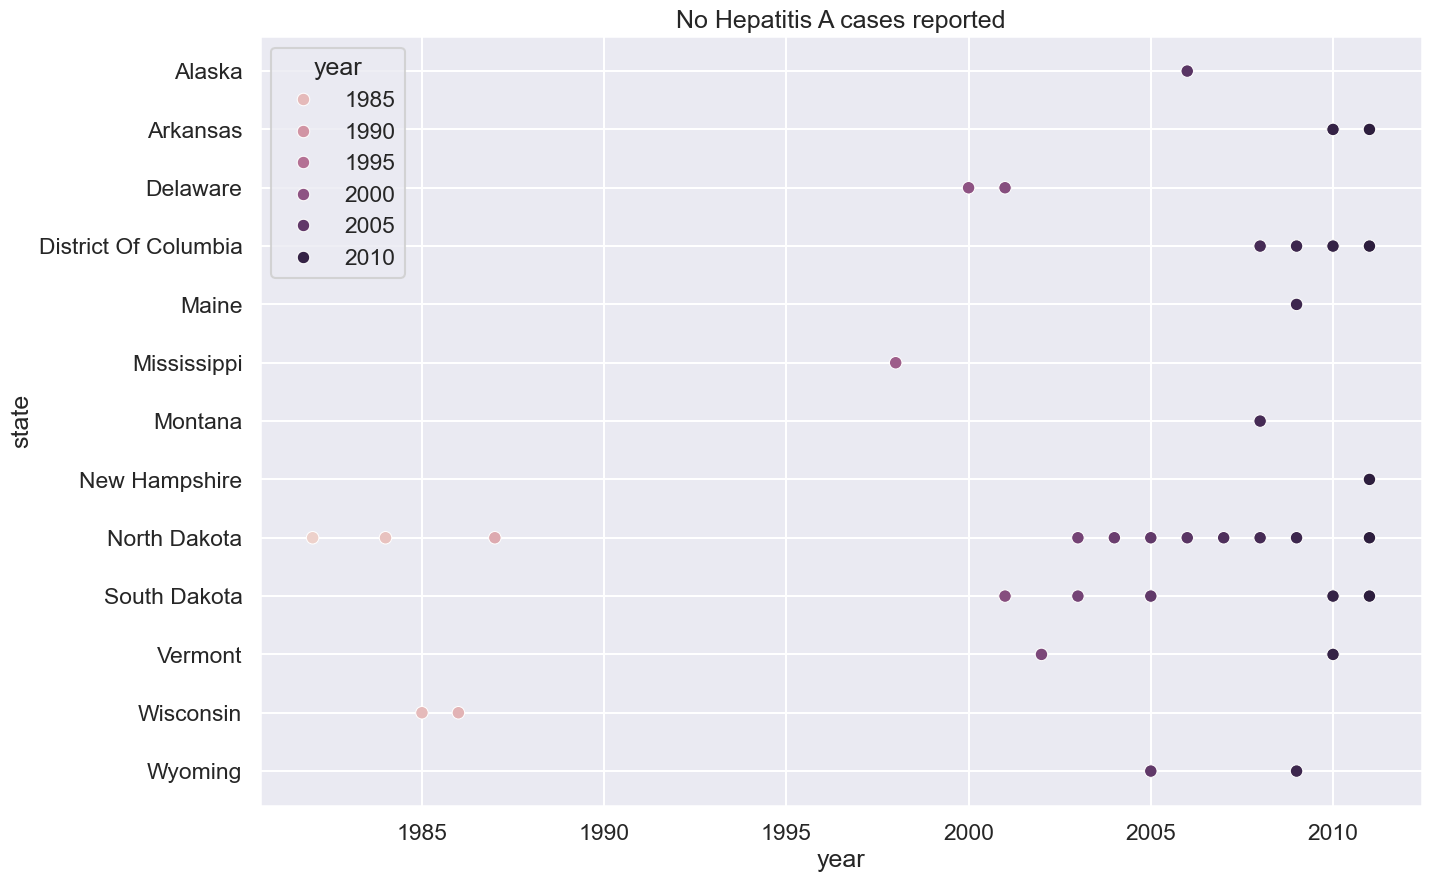

In [13]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('talk')
plt.figure(figsize=(15,10))
sns.scatterplot(y='state', x="year",
            data=aggregate_data3,
            hue="year")
plt.title("No Hepatitis A cases reported")
plt.show()

In [29]:
# Calculate the overall median of the variable "population" for the entire dataset.

population = dataset['population']
population_median = np.median(population)


# Set the sample size and iterations

sample_size = int(0.1*len(population))
iterations = 1000
sample_medians= []

# Take a random sample of the data, then calculate the sample median.
for i in range(iterations):
  sample = np.random.choice(population, size=sample_size, replace=False)

sample_median = np.median(sample)
sample_medians.append(sample_median)

# Evaluate the distribution of the sample medians.

mean_sample_medians = np.mean(sample_medians)
std_dev_sample_medians = np.std(sample_medians)


print(f"Population Median: {population_median}")
print(f"Mean of Sample Medians: {mean_sample_medians}")
print(f"Standard Deviation of Sample Medians: {std_dev_sample_medians}")

Population Median: 3294475.5
Mean of Sample Medians: 3620217.0
Standard Deviation of Sample Medians: 0.0


In [14]:
#getting just HepA
hepdata = ddata[ddata['disease'] == "Hepatitis A"]
hepdata_clean = hepdata.dropna()
hepdata.head()

,disease,state,year,weeks_reporting,count,population
0,Hepatitis A,Alabama,1966,50,321,3345787.0
1,Hepatitis A,Alabama,1967,49,291,3364130.0
2,Hepatitis A,Alabama,1968,52,314,3386068.0
3,Hepatitis A,Alabama,1969,49,380,3412450.0
4,Hepatitis A,Alabama,1970,51,413,3444165.0


In [15]:
for index, row in hepdata_clean.iterrows():
    if row['weeks_reporting'] == 0:
        hepdata_clean.loc[index,'rate'] = 0
    else:
        hepdata_clean.loc[index,'rate'] = (row['count']/row['population'])*10000 * (52/ row['weeks_reporting'])

hepdata_clean.head()

,disease,state,year,weeks_reporting,count,population,rate
0,Hepatitis A,Alabama,1966,50,321,3345787.0,0.997792
1,Hepatitis A,Alabama,1967,49,291,3364130.0,0.917968
2,Hepatitis A,Alabama,1968,52,314,3386068.0,0.927329
3,Hepatitis A,Alabama,1969,49,380,3412450.0,1.181747
4,Hepatitis A,Alabama,1970,51,413,3444165.0,1.222642


In [16]:
hepdata_sub = hepdata_clean[['state', 'rate', 'year']]
hep_MD = hepdata_sub[hepdata_sub['state'] == 'Maryland']
hep_CA = hepdata_sub[hepdata_sub['state'] == 'California']
hep_AL = hepdata_sub[hepdata_sub['state'] == 'Alabama']
res = stats.median_test(hep_MD['rate'], hep_CA['rate'])
print(res)

MedianTestResult(statistic=15.695652173913043, pvalue=7.439498404840486e-05, median=0.9687160666522197, table=array([[13, 33],
       [33, 13]], dtype=int64))


In [17]:
hepdata_sub.count()

state    2346
rate     2346
year     2346
dtype: int64

In [18]:
hep1 = hepdata_sub.sample(500, random_state=0)
hep2 = hepdata_sub.sample(500, random_state=1)
hep3 = hepdata_sub.sample(500, random_state=2)
hep_median = stats.median_test(hep1['rate'] , hep2['rate'], hep3['rate'])
print(hep_median)

MedianTestResult(statistic=2.032, pvalue=0.3620402085434875, median=0.7626115737568373, table=array([[237, 256, 257],
       [263, 244, 243]], dtype=int64))


In [19]:
hep1['rate'].median()

0.6512239696740905

In [20]:
hep2['rate'].median()

0.7787112050453711

In [21]:
hep3['rate'].median()

0.8094093751568621

In [22]:
## Looking at the P-value of the rates sampled above ^, it is too high to reject the null hypothesis

## Running Medians again, but with sample size of 10%
hep4 = hepdata_sub.sample(frac=0.1, random_state=0)
hep5 = hepdata_sub.sample(frac=0.1, random_state=1)
hep6 = hepdata_sub.sample(frac=0.1, random_state=2)
hep_median = stats.median_test(hep4['rate'] , hep5['rate'], hep6['rate'])
print(hep_median)
## The P-value is even higher than last time, probably due to the increase of sample size
## The P-value is too high to reject the null hypothesis meaning samples are not very diff

MedianTestResult(statistic=0.5900721091939222, pvalue=0.7445047441635135, median=0.8310518874989916, table=array([[114, 116, 122],
       [121, 119, 113]], dtype=int64))


In [23]:
## Looking at medians and determining p-value between 2 diff regions, South and West.
hepdata_sub2 = dataset[['region', 'rate', 'year']]
hep_south = hepdata_sub2[hepdata_sub2['region'] == 'south']
hep_west = hepdata_sub2[hepdata_sub2['region'] == 'west']
hep7south = hep_south.sample(frac=0.1, random_state=0)
hep8west = hep_west.sample(frac=0.1, random_state=1)
hep_median = stats.median_test(hep7south['rate'] , hep8west['rate'])
print(hep_median)

MedianTestResult(statistic=21.496153846153845, pvalue=3.5453904007302422e-06, median=1.0877275614166315, table=array([[25, 44],
       [53, 16]], dtype=int64))


In [24]:
yeararray = hepdata_sub2['year'].unique()

In [25]:
# create a new variable called rate and calculate the rate of the disease per 10000 people calculate row by row
yearmedian = []
for i in yeararray:
    rateholder = []
    for index, row in hepdata_sub2.iterrows():
      if row['year'] == i:
        rateholder.append(row['rate'])
    yearmedian.append([i, statistics.median(rateholder)])

print(yearmedian)

[[1966, 1.5283459843860123], [1967, 1.769257966404052], [1968, 1.9847791956277492], [1969, 2.14546419679646], [1970, 2.8088605983229384], [1971, 3.0177480453481507], [1972, 3.038713919674314], [1973, 2.2309003726695673], [1974, 1.8260180507422896], [1975, 1.6602999454281038], [1976, 1.6276408039160346], [1977, 1.5099587211221586], [1978, 1.3159026839353587], [1979, 1.2326148587456243], [1980, 1.2385531274332588], [1981, 0.9864607578595318], [1982, 0.9853584134627473], [1983, 0.7958603020289846], [1984, 0.7301699608135435], [1985, 0.5937858483932269], [1986, 0.6209404030954038], [1987, 0.7106188560647704], [1988, 0.7235458686261085], [1989, 0.7847926876385303], [1990, 0.8348518580955868], [1991, 0.7097655773020395], [1992, 0.5653686006177605], [1993, 0.3759645841361744], [1994, 0.5513518723793919], [1995, 0.4662171854827141], [1996, 0.6237420203004038], [1997, 0.6084106827635053], [1998, 0.42110923700572084], [1999, 0.30857320201961164], [2000, 0.3346701995468383], [2001, 0.271776869604

In [26]:
median_year = pd.DataFrame(yearmedian, columns=['year', 'median'])
median_year.head()

,year,median
0,1966,1.528346
1,1967,1.769258
2,1968,1.984779
3,1969,2.145464
4,1970,2.808861


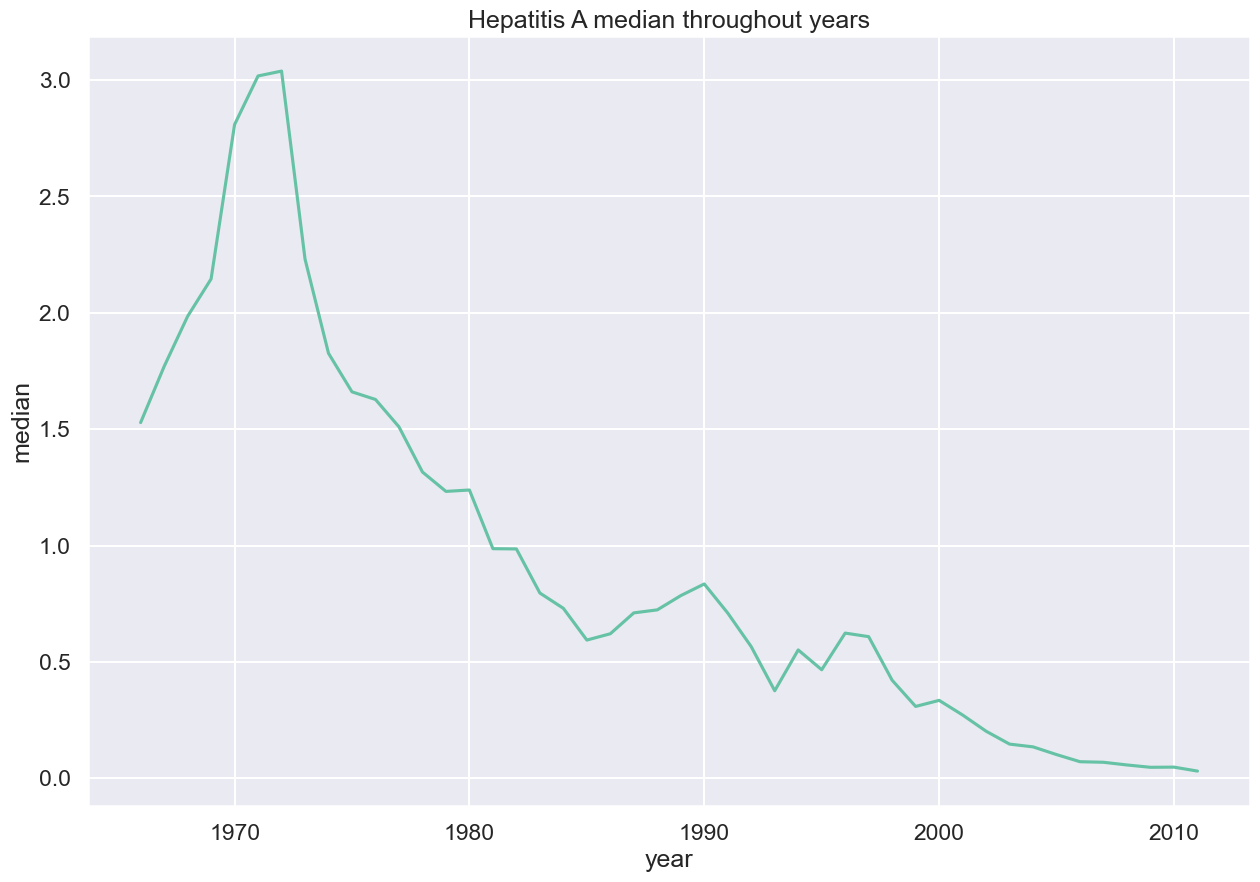

In [27]:
# Plot the data for the subset_data
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('talk')
plt.figure(figsize=(15,10))
sns.lineplot(x='year',y='median',data=median_year)
plt.title('Hepatitis A median throughout years')
plt.show()

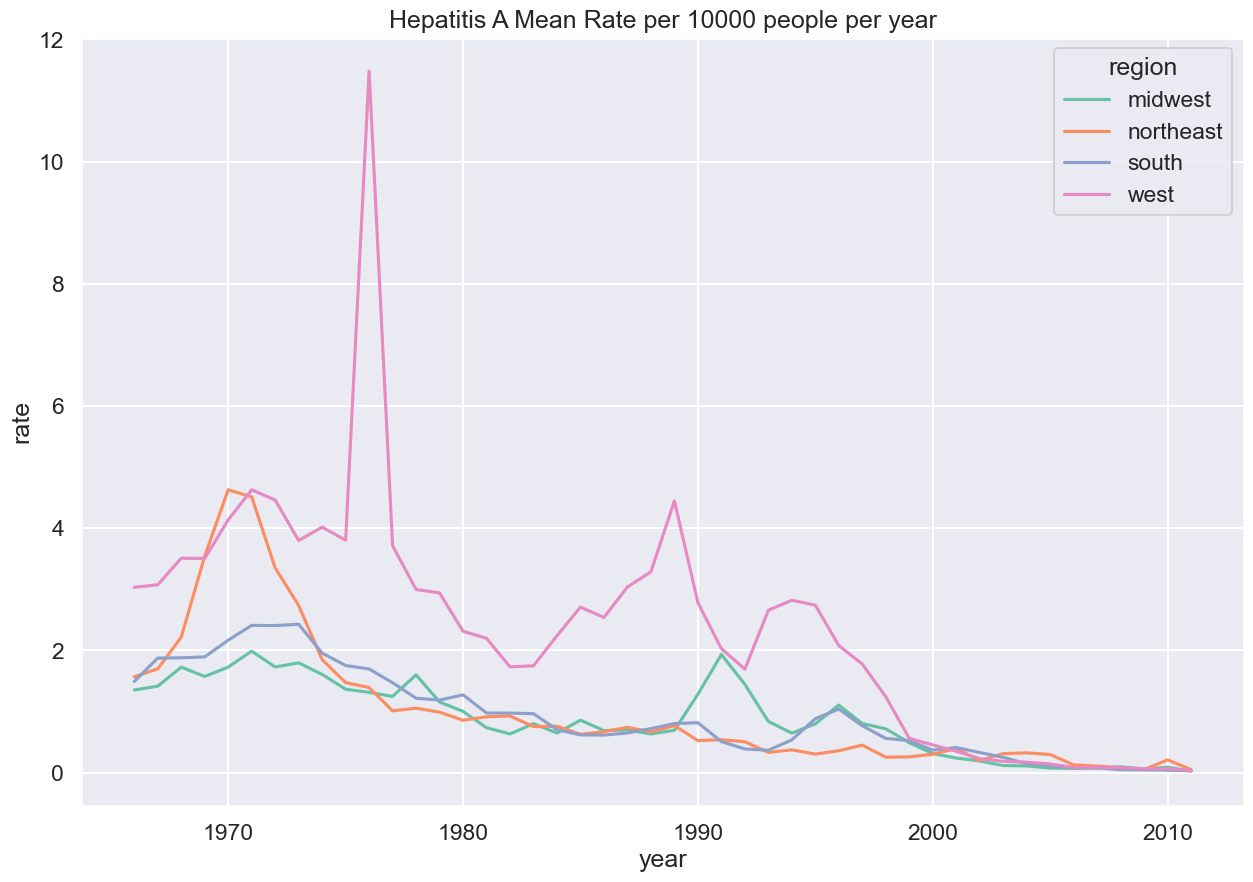

In [28]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('talk')
plt.figure(figsize=(15,10))
sns.lineplot(x='year',y='rate',hue='region',data=aggregate_data)
plt.title('Hepatitis A Mean Rate per 10000 people per year')
plt.show()